I decided to do my assignment on New Brunswick Pizzarias.

In [138]:
import pandas as pd
import numpy as np
import requests
import json
from yelp.client import Client
import matplotlib.pyplot as plt
plt.style.use('seaborn')

First I will get my data about pizzarias from yelp.

So I will first get my API and get the business search url from yelp.

In [139]:
API_KEY='_8LUoGjJLFxHrKlnYXHu7DVd_cgJCusG7K1JffrQrCm0Y1d_l_ZhwPVFLUznLzFZeQcuU0W1XoXcz6OlEWK5ACxtOCb9MtC1uP0Wyl4XQaIIZFlaYUaJQybCBroyX3Yx'

In [140]:
ENDPOINT='https://api.yelp.com/v3/businesses/search'

In [141]:
HEADERS={'Authorization':'bearer {}'.format(API_KEY)}

In [142]:
PARAMETERS={'term':'pizza','location':'New Brunswick','limit':25}

In [143]:
response=requests.get(url=ENDPOINT,params=PARAMETERS,headers=HEADERS)

In [144]:
pizza_data=response.json()
pizza_data.keys()

dict_keys(['businesses', 'total', 'region'])

In [145]:
for business in pizza_data['businesses']:
    print(business['name'])


Fadi's Pizza & Donair
Milda's Pizza
Pizza Twice
Luna Pizza
Pepper Creek Pizza
Zio's Pizza
Tony Pepperoni
New England Pizza
Pizza Delight
Twins Pizza
Mingler's Restaurant & Pub
Pizza Delight
RustiCo
Papa Georgio's Pizza
Jack's Pizza & Donair
Boston Pizza
Mrs Vanellis Fresh Italian Foods
Pizza Hut
Pizza Hut
Pizza Delight
Greco Pizza
Griffins Pub and Eatery
Greco Pizza
East Side Mario's
Brewbakers


In [146]:
for business in pizza_data['businesses']:
    print(business['rating'])

5.0
5.0
2.5
3.5
5.0
4.0
4.5
3.0
4.0
1.0
3.5
3.5
3.5
4.0
3.5
3.5
4.5
2.5
1.0
1.5
3.0
4.0
1.0
2.5
4.0


First I'll make a dataframe out of this dictionary.

In [147]:
df = pd.DataFrame.from_dict(pizza_data['businesses'])
df.columns

Index(['id', 'alias', 'name', 'image_url', 'is_closed', 'url', 'review_count',
       'categories', 'rating', 'coordinates', 'transactions', 'location',
       'phone', 'display_phone', 'distance', 'price'],
      dtype='object')

Lets determine the best bang for your buck pizza in New Brunswick. So I'll compare the rating of a pizza place with its price. 

In [148]:
df.loc[:,['price']]


,price
0,NaN
1,NaN
2,NaN
3,$$
4,NaN
5,NaN
6,NaN
7,$$
8,NaN
9,$$


In [149]:
df.price.dtype

dtype('O')

Price is wrong type and a lot of missing values. So I will drop the missing value rows from my dataframe.Then I will convert the price into a number using len and then convert dtype.

In [150]:
df=df.dropna(axis=0,subset=['price'])
df.loc[:,['price']]

,price
3,$$
7,$$
9,$$
10,$$
11,$
13,$
15,$$
17,$$
19,$$
20,$$


In [151]:
df.price=df.price.apply(lambda x:len(x))
df.price.astype('int')
df.price.dtype

dtype('int64')

I'm going to add a "Value" column to quantify the ratio of rating to price

In [152]:
df['value']=df.rating/df.price

In [153]:
df.loc[:,['name','price','rating','value']]

,name,price,rating,value
3,Luna Pizza,2,3.5,1.750000
7,New England Pizza,2,3.0,1.500000
9,Twins Pizza,2,1.0,0.500000
10,Mingler's Restaurant & Pub,2,3.5,1.750000
11,Pizza Delight,1,3.5,3.500000
13,Papa Georgio's Pizza,1,4.0,4.000000
15,Boston Pizza,2,3.5,1.750000
17,Pizza Hut,2,2.5,1.250000
19,Pizza Delight,2,1.5,0.750000
20,Greco Pizza,2,3.0,1.500000


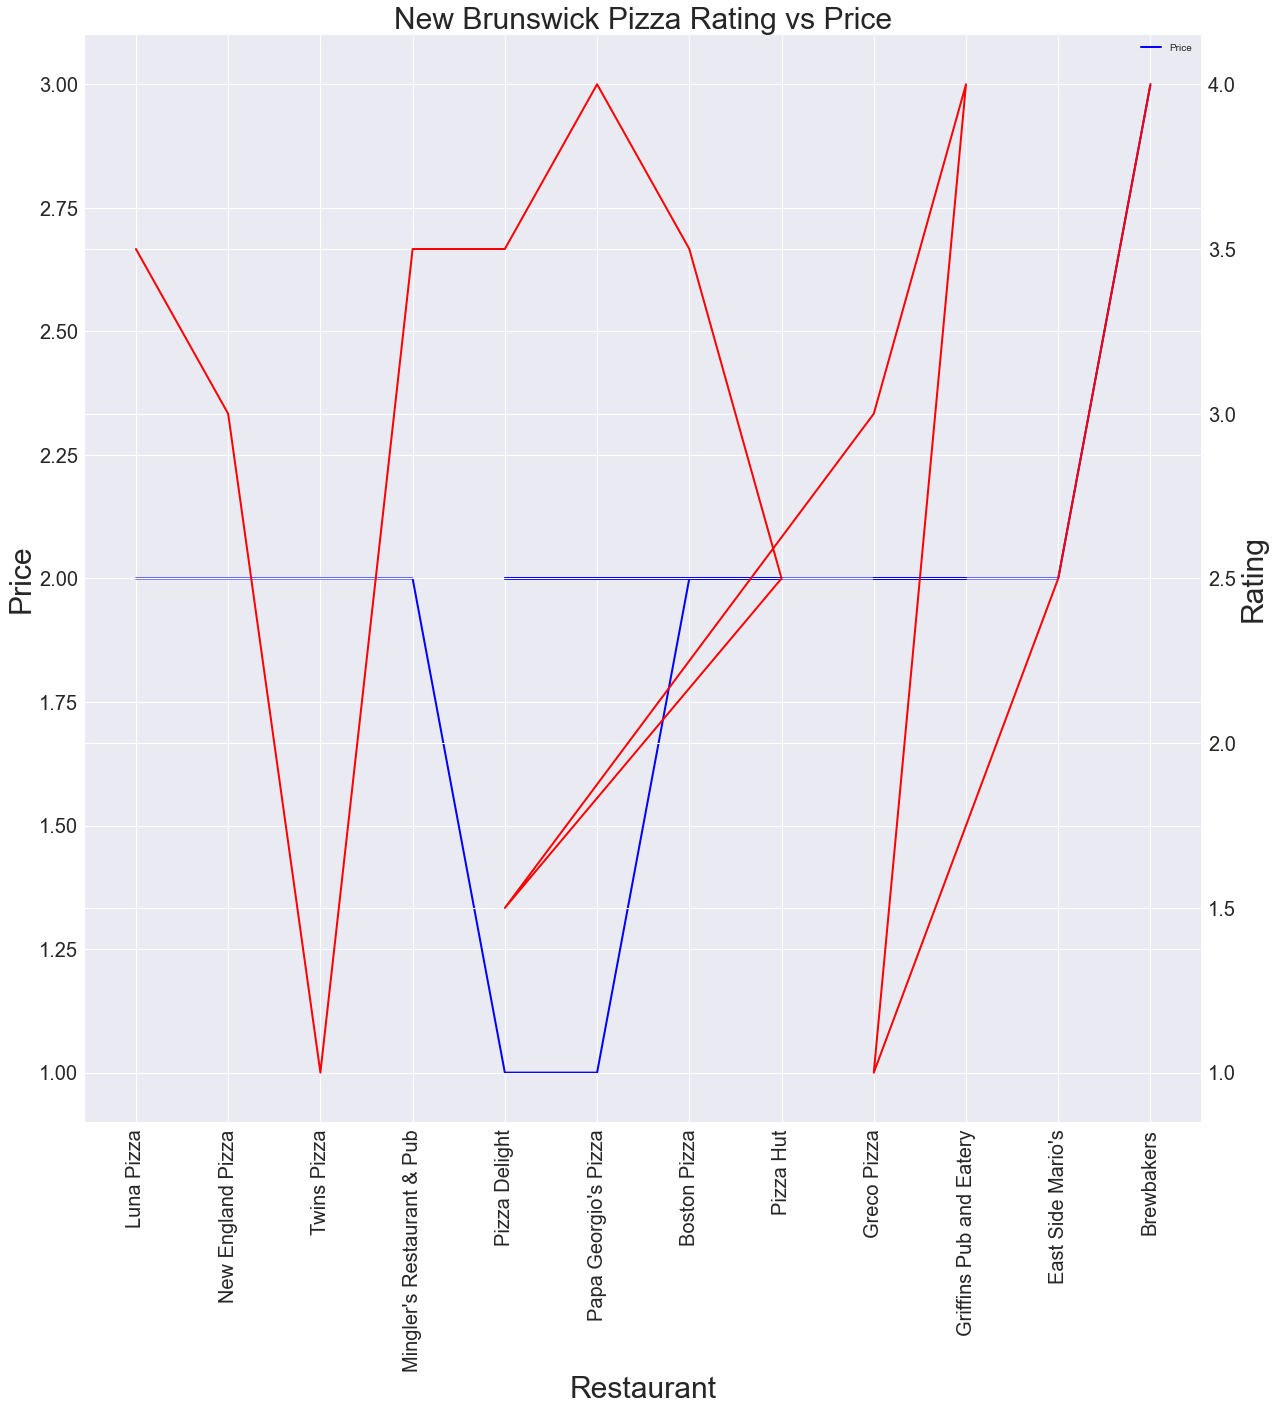

In [162]:
x=df.name
y1=df.price
y2=df.rating
fig,ax1=plt.subplots(figsize=(20,20))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.xticks(rotation=90)
ax1.set_xlabel('Restaurant',fontsize=30)
ax1.set_ylabel('Price',fontsize=30)
ax1.set_title("New Brunswick Pizza Rating vs Price",fontsize=30)
ax1.plot(x,y1,linewidth=2,color='blue')
ax2=ax1.twinx()
ax2.set_ylabel('Rating',fontsize=30)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.xticks(rotation=90)
ax2.plot(x,y2,linewidth=2,color='red')
ax1.legend(('Price','Rating'),loc='upper right',shadow=True)


In [155]:
df[df.value==max(df.value)]['name']

13    Papa Georgio's Pizza
Name: name, dtype: object

Above is the pandas way to identify the best restaurant. I will next plot restaurant vs rating to show the visualaztion way. 

Text(0.5, 1.0, 'Value of New Brunswick Pizza Shops')

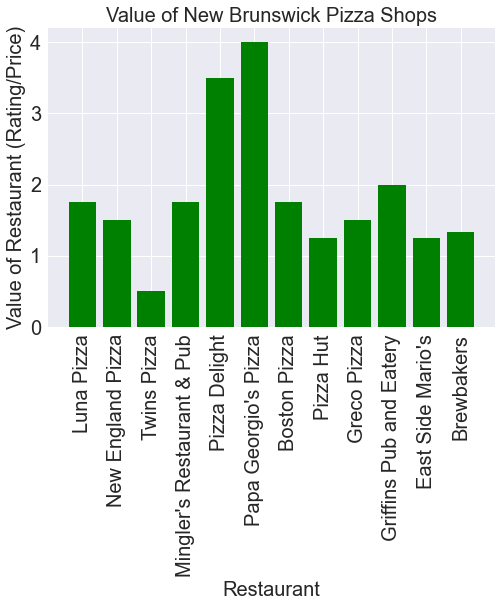

In [156]:
plt.bar(df.name,df.value,color='green')
plt.xticks(rotation=90)
plt.xlabel('Restaurant', fontsize=20)
plt.ylabel('Value of Restaurant (Rating/Price)',fontsize=20)
plt.title("Value of New Brunswick Pizza Shops",fontsize=20)

Thus, Papa Georgio's Pizza is the best bang for the buck with Pizza Delight being a close second. And Twin Pizza is the worst value.